# Regression

In [12]:
# !pip install pandas matplotlib scikit-learn numpy scipy

## Linear Regression (2D)

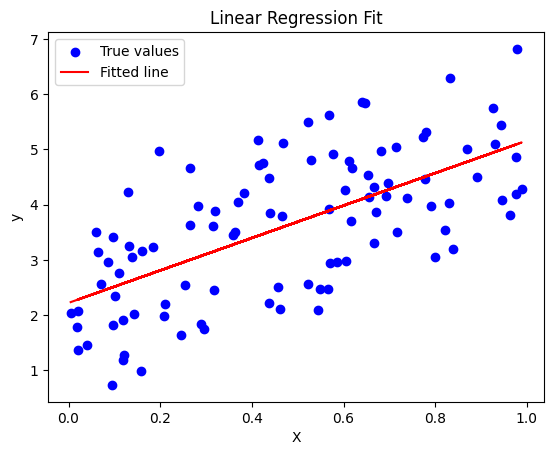

R-squared: 0.41941554964783967
Adjusted R-squared: 0.41349121852179715


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 3 * X.squeeze() + 2 + np.random.randn(100)  # y = 3*x + 2 + noise

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Plotting the original data (scatter plot)
plt.scatter(X, y, color='blue', label='True values')

# Plotting the linear fit (line)
plt.plot(X, y_pred, color='red', label='Fitted line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

# Get R-squared
r2 = model.score(X, y)
print(f"R-squared: {r2}")

# Calculate Adjusted R-squared
n = X.shape[0]  # Number of observations
k = X.shape[1]  # Number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

## Linear Regression (3D)

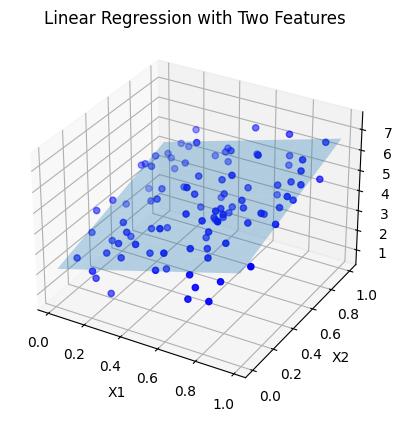

R-squared: 0.4872107989477158
Adjusted R-squared: 0.4766378257301429


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Generate some sample data with two features
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = 3 * X[:, 0] + 2 * X[:, 1] + 2 + np.random.randn(100)  # y = 3*x1 + 2*x2 + 2 + noise

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the original data (scatter plot)
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='True values')

# Create a meshgrid for plotting the plane
x0_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
xx0, xx1 = np.meshgrid(x0_range, x1_range)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
yy = model.predict(mesh_data).reshape(xx0.shape)

# Plotting the plane
ax.plot_surface(xx0, xx1, yy, alpha=0.3, label='Fitted plane')

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.title('Linear Regression with Two Features')

plt.show()

# Get R-squared
r2 = model.score(X, y)
print(f"R-squared: {r2}")

# Calculate Adjusted R-squared
n = X.shape[0]  # Number of observations
k = X.shape[1]  # Number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

## R2 & RMSE

Coefficients: [0.09088117 0.26501754]
Intercept: 0.5681370921350042
Train RMSE: 1.06
Train R2: 0.45
Test RMSE: 0.81
Test R2: 0.48


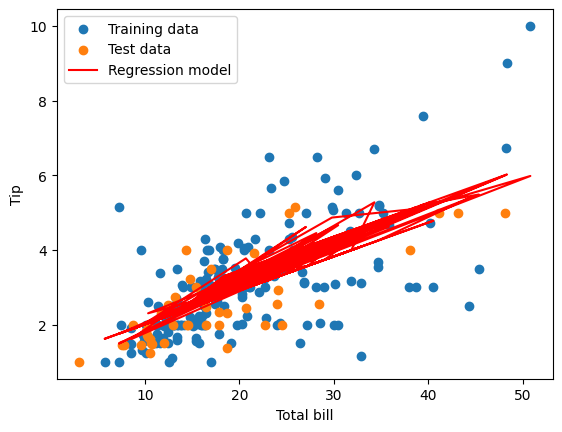

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# Preprocess the data
X = data[['total_bill', 'size']]
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Train R2: {train_r2:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test R2: {test_r2:.2f}')

# Visualize the data and the model
fig, ax = plt.subplots()
ax.scatter(X_train['total_bill'], y_train, label='Training data')
ax.scatter(X_test['total_bill'], y_test, label='Test data')
ax.plot(X_train['total_bill'], model.predict(X_train), color='red', label='Regression model')
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip')
ax.legend()
plt.show()


## Using StandardScaler

Train RMSE: 1.06
Train R2: 0.45
Test RMSE: 0.81
Test R2: 0.48


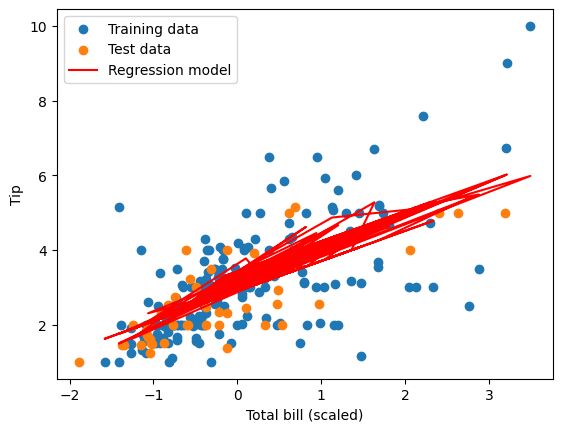

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# Preprocess the data
X = data[['total_bill', 'size']]
y = data['tip']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Train R2: {train_r2:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test R2: {test_r2:.2f}')

# Visualize the data and the model
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], y_train, label='Training data')
ax.scatter(X_test[:, 0], y_test, label='Test data')
ax.plot(X_train[:, 0], model.predict(X_train), color='red', label='Regression model')
ax.set_xlabel('Total bill (scaled)')
ax.set_ylabel('Tip')
ax.legend()
plt.show()


## sklearn.tree.DecisionTreeRegressor

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2)

# Create a decision tree regressor with default parameters
regressor = DecisionTreeRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 0.5591488221364341


### Using hyper parameters

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2)

# Define a grid of hyperparameters to search over
param_grid = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Create a grid search object to find the best hyperparameters
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters:', grid_search.best_params_)

# Make predictions on the test data using the best model found by the grid search
y_pred = grid_search.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.4152466105763408


### Using Poisson

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2)

# Create a decision tree regressor with Poisson loss and maximum depth of 10
regressor = DecisionTreeRegressor(criterion='poisson', max_depth=10)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 0.3837752226874769


### Using min_impurity

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2)

# Create a decision tree regressor with minimum impurity decrease of 0.01
regressor = DecisionTreeRegressor(min_impurity_decrease=0.01)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 0.590788289487671


### MAE, R2 y RMSLE

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2)

# Create a decision tree regressor with default parameters
regressor = DecisionTreeRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error (MAE):', mae)

# Calculate the coefficient of determination (R2) of the predictions
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R2):', r2)

# Calculate the root mean squared logarithmic error (RMSLE) of the predictions
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print('Root mean squared logarithmic error (RMSLE):', rmsle)


Mean absolute error (MAE): 0.4616736119186047
Coefficient of determination (R2): 0.5979325514062643
Root mean squared logarithmic error (RMSLE): 0.21050769825919538


### Checking Over Fitting

To determine whether the model has overfit, we can compare the performance of the model on the training and test sets. If the model performs much better on the training set than on the test set, it is likely that the model has overfit the training data.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2)

# Create a decision tree regressor with default parameters
regressor = DecisionTreeRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Evaluate the performance of the model on the training set
y_train_pred = regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('Training set mean squared error:', mse_train)

# Evaluate the performance of the model on the test set
y_test_pred = regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Test set mean squared error:', mse_test)


Training set mean squared error: 7.691776025955845e-32
Test set mean squared error: 0.48338888452444284


### Comparing with Linear Regression

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2)

# Train a decision tree regressor with default parameters
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the performance of the decision tree regressor on the test set
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree Regressor test set mean squared error:', mse_dt)

# Evaluate the performance of the linear regression model on the test set
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression test set mean squared error:', mse_lr)


Decision Tree Regressor test set mean squared error: 0.49285454012490304
Linear Regression test set mean squared error: 0.5282298851029996


### Different Hyper Parameters

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    california_housing.data, california_housing.target, test_size=0.2
)

# Define a dictionary of hyperparameters to try
params = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    # 'auto' has been deprecated and will be removed in 1.3
    #   See: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
    "max_features": ["sqrt", "log2"],
}

# Train and evaluate a decision tree regressor for each set of hyperparameters
for max_depth in params["max_depth"]:
    for min_samples_split in params["min_samples_split"]:
        for min_samples_leaf in params["min_samples_leaf"]:
            for max_features in params["max_features"]:
                # Create a decision tree regressor with the current set of hyperparameters
                regressor = DecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    max_features=max_features,
                )

                # Train the model and time how long it takes
                start_time = time.time()
                regressor.fit(X_train, y_train)
                train_time = time.time() - start_time

                # Make predictions on the test data and time how long it takes
                start_time = time.time()
                y_pred = regressor.predict(X_test)
                predict_time = time.time() - start_time

                # Calculate the mean squared error of the predictions
                mse = mean_squared_error(y_test, y_pred)

                # Print the hyperparameters, mean squared error, and time taken to train and predict
                print(
                    f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, max_features={max_features}: MSE={mse:.4f}, Train time={train_time:.4f} sec, Predict time={predict_time:.4f} sec"
                )

max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=sqrt: MSE=0.7310, Train time=0.0121 sec, Predict time=0.0002 sec
max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=log2: MSE=0.5397, Train time=0.0186 sec, Predict time=0.0700 sec
max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=sqrt: MSE=0.6328, Train time=0.0118 sec, Predict time=0.0002 sec
max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=log2: MSE=0.5529, Train time=0.0156 sec, Predict time=0.0003 sec
max_depth=5, min_samples_split=2, min_samples_leaf=5, max_features=sqrt: MSE=0.8748, Train time=0.0115 sec, Predict time=0.0002 sec
max_depth=5, min_samples_split=2, min_samples_leaf=5, max_features=log2: MSE=0.5419, Train time=0.0151 sec, Predict time=0.0003 sec
max_depth=5, min_samples_split=5, min_samples_leaf=1, max_features=sqrt: MSE=0.5879, Train time=0.0121 sec, Predict time=0.0002 sec
max_depth=5, min_samples_split=5, min_samples_leaf=1, max_features=log2: MSE

## Linear Regression Vs Decision Trees (Same dataset)

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Instantiate the decision tree regressor model with default hyperparameters
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set using both models
y_pred_linear = linear_regressor.predict(X_test)
y_pred_tree = tree_regressor.predict(X_test)

# Calculate evaluation metrics for both models
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)

tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)

# Print the evaluation metrics for both models
print("Linear Regression Evaluation metrics:")
print("MAE: {:.2f}".format(linear_mae))
print("R2 score: {:.2f}".format(linear_r2))
print("MSE: {:.2f}".format(linear_mse))

print("Decision Tree Regression Evaluation metrics:")
print("MAE: {:.2f}".format(tree_mae))
print("R2 score: {:.2f}".format(tree_r2))
print("MSE: {:.2f}".format(tree_mse))


Linear Regression Evaluation metrics:
MAE: 0.53
R2 score: 0.58
MSE: 0.56
Decision Tree Regression Evaluation metrics:
MAE: 0.45
R2 score: 0.62
MSE: 0.49


### Plotting

From https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

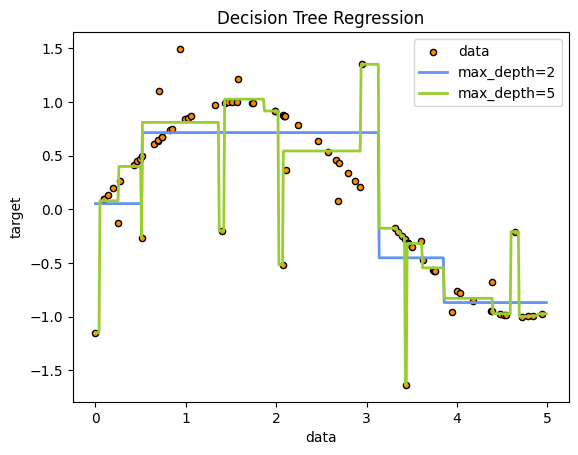

In [26]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

TEST 

In [27]:
import pandas as pd

# Create an empty DataFrame with column names
df = pd.DataFrame(columns=['Name', 'Age', 'City'])

# Add a row to the DataFrame using a dictionary
df = pd.concat([df, pd.DataFrame({'Name': ['Alice'], 'Age': [25], 'City': ['New York']})], ignore_index=True)

# Add another row to the DataFrame using a list
df = pd.concat([df, pd.DataFrame([['Bob', 30, 'San Francisco']], columns=['Name', 'Age', 'City'])], ignore_index=True)

# Add multiple rows to the DataFrame using a list of dictionaries
rows = [{'Name': 'Charlie', 'Age': 35, 'City': 'Chicago'},
        {'Name': 'David', 'Age': 40, 'City': 'Los Angeles'},
        {'Name': 'Emma', 'Age': 45, 'City': 'Boston'}]
df = pd.concat([df, pd.DataFrame(rows)], ignore_index=True)

# Print the resulting DataFrame
print(df)


      Name Age           City
0    Alice  25       New York
1      Bob  30  San Francisco
2  Charlie  35        Chicago
3    David  40    Los Angeles
4     Emma  45         Boston
